In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists():
  urlretrieve(MNIST_URL, path_gz)

In [4]:
# urlretrieve??

In [5]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Jul  4 09:47 mnist.pkl.gz


In [6]:
with gzip.open(path_gz, 'rb') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [ ]:
len(lst1)

784

In [ ]:
def chunks(x, sz):
  for i in range(0, len(x), sz):
    yield x[i:i+sz]

In [ ]:
# def chunks(x, sz):
#   img = []
#   for i in range(0, len(x), sz):
#     img.append(x[i:i+sz])

#   return img

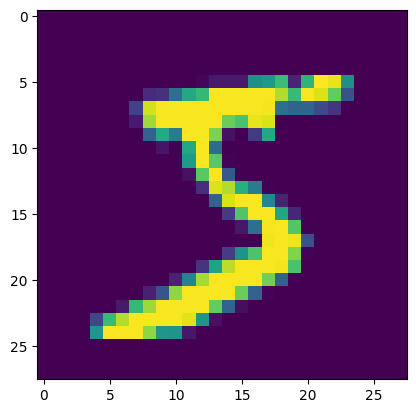

In [ ]:
plt.imshow(list(chunks(lst1, 28)))

In [ ]:
from itertools import islice

In [ ]:
it = iter(vals)
isit = islice(it, 5)
list(isit)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [ ]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))


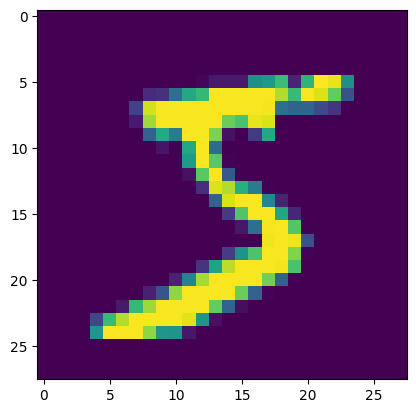

In [ ]:
plt.imshow(img)

In [ ]:
img[20][15]

0.98828125

In [ ]:
class Matrix:
  def __init__(self, xs):
    self.xs = xs

  def __getitem__(self, idxs):
    return  self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20, 15]

0.98828125

In [27]:
import torch
from torch import tensor

In [ ]:
tensor([1, 2, 3])


tensor([1, 2, 3])

In [ ]:
tens = tensor(img)

In [ ]:
tens[20, 15]

tensor(0.9883)

In [36]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [ ]:
x_train.type()

'torch.FloatTensor'

In [ ]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

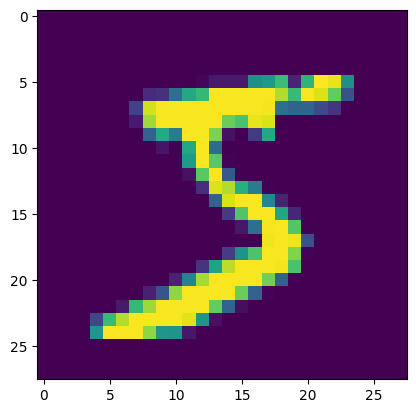

In [ ]:
plt.imshow(imgs[0])

In [ ]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [ ]:
rnd_state = None
def seed(a):
  global rnd_state
  a, x = divmod(a, 30268)
  a, y = divmod(a, 30306)
  a, z = divmod(a, 30322)

  rnd_state = int(x)+1, int(y)+1, int(z)+1

In [ ]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [ ]:
def rand():
  global rnd_state
  x, y, z = rnd_state
  x = (171 * x) % 30269
  y = (172 * y) % 30307
  z = (170 * z) % 30323
  rnd_state = x, y, z
  return (x/30269 + y/30307 + z/30323) % 1.0

In [ ]:
rand(), rand(), rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [ ]:
if os.fork():
  print(f"In parent: {torch.rand(1)}")
else:
  print(f'In child: {torch.rand(1)}')

In parent: tensor([0.7710])
In child: tensor([0.7710])


In [8]:
import torch

In [38]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [39]:
m1 = x_valid[:5]
m2 = weights

In [40]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [12]:
t1 = torch.zeros(m1.shape[0], m2.shape[1])
t1.shape

torch.Size([5, 10])

In [13]:
for i in range(t1.shape[0]):
  for j in range(t1.shape[1]):
    for k in range(m1.shape[1]):
      t1[i, j] += m1[i, k] * m2[k, j]

In [14]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [15]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [16]:
def matmul(a, b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(ac):
        c[i, j] += a[i, k] * b[k, j]
  return c

In [17]:
%time _=matmul(m1, m2)

CPU times: user 1.95 s, sys: 21.4 ms, total: 1.97 s
Wall time: 5.12 s


In [18]:
from numba import njit

In [19]:
@njit
def dot(a, b):
  res = 0.
  for i in range(len(a)):
    res +=a[i]*b[i]
  return res

In [20]:
from numpy import array

In [21]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 729 ms, sys: 123 ms, total: 852 ms
Wall time: 1.17 s


20.0

In [22]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 43.9 µs


20.0

In [23]:
a = torch.tensor([10, 6, -4])
b = torch.tensor([2, 8, 7])
a, b

(tensor([10,  6, -4]), tensor([2, 8, 7]))

In [24]:
a+b

tensor([12, 14,  3])

In [25]:
(a < b).float().mean()

tensor(0.67)

In [28]:
m = tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [29]:
sf = (m*m).sum()
sf

tensor(285)

In [30]:
sf.sqrt()

tensor(16.88)

In [31]:
def matmul(a, b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      c[i, j] = (a[i, :] * b[:, j]).sum()

In [41]:
%timeit -n 50 _=matmul(m1, m2)

1.77 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [42]:
c = torch.tensor([10, 20, 30])
c[None, :], c.unsqueeze(0)

(tensor([[10, 20, 30]]), tensor([[10, 20, 30]]))

In [43]:
c[..., None]

tensor([[10],
        [20],
        [30]])

In [44]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [45]:
digit[:, None].shape

torch.Size([784, 1])

In [46]:
digit[:, None].expand_as(m2).shape

torch.Size([784, 10])

In [47]:
(digit[:, None]*m2).shape

torch.Size([784, 10])

In [48]:
def matmul(a, b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    c[i] = (a[i,:,None] * b).sum(dim=0)
  return c

In [49]:
%timeit -n 50 _=matmul(m1, m2)

222 µs ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [50]:
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [51]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [52]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [53]:
def matmul(a, b):
  return torch.einsum('ik,kj->ij', m1, m2)

In [57]:
%timeit -n 5 _ = matmul(x_train, weights)

The slowest run took 6.08 times longer than the fastest. This could mean that an intermediate result is being cached.
89.6 µs ± 83.1 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [56]:
 %timeit -n 5 _ = torch.matmul(x_train, weights)

39 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [58]:
def matmul(grid, a, b, c):
  i, j = grid
  if i < c.shape[0] and j < c.shape[1]:
    tmp=0.
    for k in range(a.shape[1]):
      tmp += a[i, k] * b[k, j]
    c[i,j] = tmp

In [61]:
res = torch.zeros(m1.shape[0], m2.shape[1])
matmul((0, 0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [62]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
  for i in range(grid_x):
    for j in range(grid_y):
      kernel((i, j), *args, **kwargs)


In [63]:
res = torch.zeros(m1.shape[0], m2.shape[1])
launch_kernel(matmul, m1.shape[0], m2.shape[1], m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [64]:
from numba import cuda

In [65]:
@cuda.jit
def matmul(a, b, c):
  i, j = cuda.grid(2)
  if i < c.shape[0] and j < c.shape[1]:
    tmp = 0.
    for k in range(a.shape[1]):
      tmp += a[i, k] * b[k, j]
    c[i, j] = tmp